<a href="https://colab.research.google.com/github/sgumiere/GAE-1004/blob/Thermique/thermique_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp

# Déclaration des variables et symboles
z, t, s = sp.symbols('z t s', real=True, positive=True)
KT, T0 = sp.symbols('K_T T_0', real=True, positive=True)

# Fonction inconnue T(z,t)
T = sp.Function('T')(z, t)

# 1. Équation de diffusion thermique
diff_eq = sp.Eq(sp.Derivative(T, t), KT * sp.Derivative(T, z, z))
print("Équation de diffusion thermique :")
print("")
display(diff_eq)

# 2. Appliquer la transformation de Laplace par rapport au temps t
# Définir la transformée de Laplace : L{T(z,t)} = T̄(z,s)
T_bar = sp.Function('T_bar')(z)  # fonction dans l’espace de Laplace

# Laplace(∂T/∂t) = s * T̄(z,s) - T(z,0) = s * T̄
# Laplace(∂²T/∂z²) = d²T̄/dz²
# Condition initiale : T(z, 0) = 0
laplace_eq = sp.Eq(s * T_bar, KT * sp.diff(T_bar, z, z))
print("")
print("EDO après transformation de Laplace :")
print("")
display(laplace_eq)

# 3. Résoudre l’EDO
sol_laplace = sp.dsolve(laplace_eq, T_bar)
print("")
print("Solution générale dans l’espace de Laplace :")
print("")
display(sol_laplace)

# 4. Appliquer les conditions aux limites
# T(0,t) = T0 ⇒ T̄(0) = T0 / s
# T(∞,t) = 0 ⇒ T̄(∞) = 0 ⇒ constante B = 0
C1, C2 = sp.symbols('C1 C2')
T_bar_z = sol_laplace.rhs
T_bar_z = T_bar_z.subs({C1: sp.Symbol('A'), C2: 0})  # B=0 (décroissance à ∞)

# Appliquer T̄(0) = T0/s
A_val = sp.solve(T_bar_z.subs(z, 0) - T0/s, 'A')[0]
T_bar_z = T_bar_z.subs('A', A_val)
print("")
print("Solution dans l’espace de Laplace avec conditions aux limites :")
print("")
display(T_bar_z)

# 5. Inverser la transformation de Laplace
# Résultat attendu : T(z,t) = T0 * erfc(z / (2*sqrt(KT*t)))
T_sol = sp.inverse_laplace_transform(T_bar_z, s, t)
T_sol = sp.simplify(T_sol)

print("")
print("Solution finale T(z,t) :")
print("")
display(T_sol)


from sympy import erfc, sqrt, simplify, erf

# Essayez de remplacer manuellement
z_expr = z / (2 * sp.sqrt(KT * t))
T_sol_erfc = T0 * (1 - erf(z_expr))  # 1 - erf(x) = erfc(x)
T_sol_erfc = simplify(T_sol_erfc)
print("")
print("Forme simplifiée avec erf :")
print("")
display(T_sol_erfc)




Équation de diffusion thermique :



Eq(Derivative(T(z, t), t), K_T*Derivative(T(z, t), (z, 2)))


EDO après transformation de Laplace :



Eq(s*T_bar(z), K_T*Derivative(T_bar(z), (z, 2)))


Solution générale dans l’espace de Laplace :



Eq(T_bar(z), C1*exp(-sqrt(s)*z/sqrt(K_T)) + C2*exp(sqrt(s)*z/sqrt(K_T)))


Solution dans l’espace de Laplace avec conditions aux limites :



T_0*exp(-sqrt(s)*z/sqrt(K_T))/s


Solution finale T(z,t) :



T_0*z**2*(-4*sqrt(pi)*K_T*t*erf(z/(2*sqrt(K_T)*sqrt(t)))/z**2 + 4*sqrt(pi)*K_T*t/z**2)/(4*sqrt(pi)*K_T*t)


Forme simplifiée avec erf :



T_0*(1 - erf(z/(2*sqrt(K_T)*sqrt(t))))

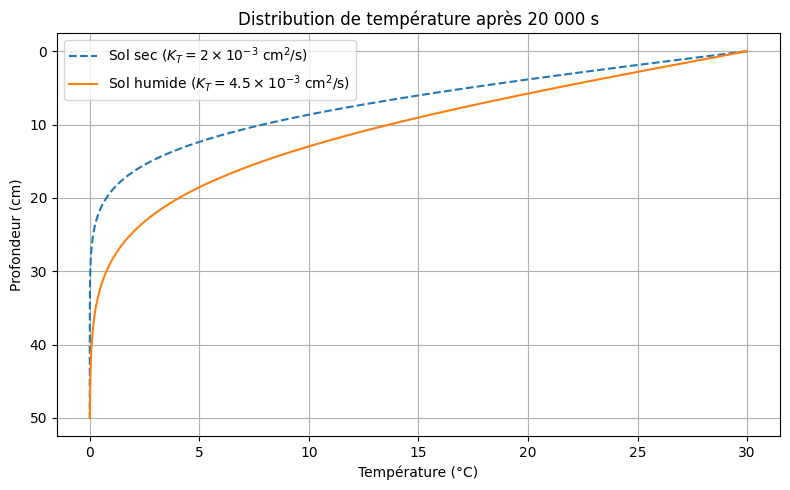

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Paramètres
T0 = 30  # Température de surface en °C
t = 20000  # temps en secondes

# Diffusivité thermique (cm^2/s)
K_dry = 2e-3       # sol sec
K_wet = 4.5e-3     # sol humide

# Profondeur en cm
x = np.linspace(0, 50, 500)

# Calcul de la température
T_dry = T0 * erfc(x / (2 * np.sqrt(K_dry * t)))
T_wet = T0 * erfc(x / (2 * np.sqrt(K_wet * t)))

# Tracé
plt.figure(figsize=(8, 5))
plt.plot(T_dry, x, label="Sol sec ($K_T = 2 \\times 10^{-3}$ cm$^2$/s)", linestyle='--')
plt.plot(T_wet, x, label="Sol humide ($K_T = 4.5 \\times 10^{-3}$ cm$^2$/s)", linestyle='-')
plt.ylabel("Profondeur (cm)")
plt.xlabel("Température (°C)")
plt.title("Distribution de température après 20 000 s")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [3]:
# prompt: make a plot with a slider to change the kt

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from ipywidgets import interact, FloatSlider

# Paramètres
T0 = 30  # Température de surface en °C
t = 20000  # temps en secondes

# Profondeur en cm
x = np.linspace(0, 50, 500)


def plot_temperature(kt):
  """
  Fonction pour tracer la distribution de température en fonction de kt.
  """
  # Calcul de la température
  T = T0 * erfc(x / (2 * np.sqrt(kt * t)))

  # Tracé
  plt.figure(figsize=(8, 5))
  plt.plot(T, x, label=f"K_T = {kt} cm$^2$/s")
  plt.ylabel("Profondeur (cm)")
  plt.xlabel("Température (°C)")
  plt.title("Distribution de température après 20 000 s")
  plt.legend()
  plt.grid(True)
  plt.gca().invert_yaxis()
  plt.tight_layout()
  plt.show()


# Créer un slider pour kt
interact(plot_temperature, kt=FloatSlider(value=2e-3, min=1e-4, max=1e-2, step=1e-4, description='Kt:'))


interactive(children=(FloatSlider(value=0.002, description='Kt:', max=0.01, min=0.0001, step=0.0001), Output()…

<function __main__.plot_temperature(kt)>

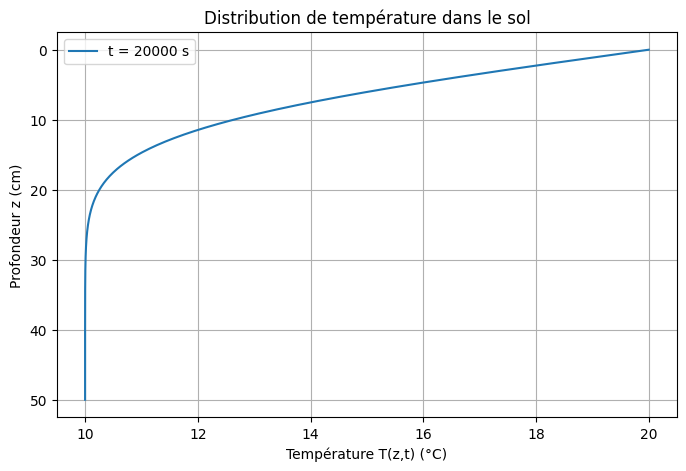

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Paramètres
T0 = 20.0         # Température à la surface en °C
T_moyen = 10.0    # Température moyenne à l'infini en °C
KT = 2e-3         # Diffusivité thermique en cm²/s
t = 20000         # Temps en secondes

# Définir un vecteur de profondeur z en cm
z = np.linspace(0, 50, 500)  # de 0 à 50 cm

# Calcul de la distribution de température T(z,t)
T = T_moyen + (T0 - T_moyen) * erfc(z / (2 * np.sqrt(KT * t)))

# Tracé du profil de température
plt.figure(figsize=(8, 5))
plt.plot(T, z,label=f't = {t} s')
plt.ylabel('Profondeur z (cm)')
plt.xlabel('Température T(z,t) (°C)')
plt.title('Distribution de température dans le sol')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

In [7]:
from sympy import symbols, Eq, solve, sin, pi, exp, log, asin, re, simplify
from sympy.abc import t, z

# === Données et constantes ===

# Périodes (en secondes)
Pday = 24 * 3600  # 1 jour = 86400 s
Pyear = 365 * 24 * 3600  # 1 an = 31536000 s

# Fréquences angulaires
omega_day = 2 * pi / Pday
omega_year = 2 * pi / Pyear

# Conductivité thermique et capacité thermique volumique
k = 0.3  # W/m°C
Cv = 1.5e6  # J/m³°C
DT = k / Cv  # Diffusivité thermique (m²/s)

# Profondeur d'atténuation journalière
d_day = (2 * DT / omega_day)**0.5

# === Exercice 3a: Amplitude à différentes profondeurs ===
A0 = 15  # Amplitude de surface (°C)
Tsol = 15  # Température moyenne (°C)

z1 = 0.055  # 5.5 cm
z2 = 0.11   # 11 cm
z3 = 0.165  # 16.5 cm

Az1 = A0 * exp(-z1 / d_day)
Az2 = A0 * exp(-z2 / d_day)
Az3 = A0 * exp(-z3 / d_day)

# === Exercice 3b: Temps du maximum de température à z = 5.5 cm ===
Tmax = Tsol + Az1
T_expr = Tsol + A0 * exp(-z1 / d_day) * sin(omega_day * t - z1 / d_day)
eq_t = Eq(T_expr, Tmax)
t_sol = solve(eq_t, t)
t_max_real = re(t_sol[0])  # Partie réelle en secondes
t_max_hr = t_max_real / 3600  # en heures

# === Exercice 4: Profondeur à 5 % de l'amplitude annuelle ===
d_year = (2 * DT / omega_year)**0.5
Az_ratio = 0.05
z_target = -d_year * log(Az_ratio)

# === Affichage des résultats ===
print(f"ω_day = {omega_day.evalf()} rad/s")
print(f"ω_year = {omega_year.evalf()} rad/s")
print(f"Diffusivité thermique = {DT} m²/s")
print(f"Profondeur d'atténuation journalière = {d_day.evalf()} m")
print(f"Amplitude à 5.5 cm = {Az1.evalf()} °C")
print(f"Amplitude à 11 cm = {Az2.evalf()} °C")
print(f"Amplitude à 16.5 cm = {Az3.evalf()} °C")
print(f"Tmax à 5.5 cm atteint à t = {t_max_real.evalf()} s ≈ {t_max_hr.evalf()} h")
print(f"Profondeur à 5% de l'amplitude annuelle = {z_target.evalf()} m")
print('')
display(eq_t)
print('')
display(t_sol)

ω_day = 0.0000727220521664304 rad/s
ω_year = 1.99238499086111E-7 rad/s
Diffusivité thermique = 2e-07 m²/s
Profondeur d'atténuation journalière = 0.0741646467884524 m
Amplitude à 5.5 cm = 7.14531552466750 °C
Amplitude à 11 cm = 3.40370226313696 °C
Amplitude à 16.5 cm = 1.62136844147590 °C
Tmax à 5.5 cm atteint à t = 31797.6389334122 s ≈ 8.83267748150339 h
Profondeur à 5% de l'amplitude annuelle = 4.24469376258985 m



Eq(15*exp(-0.418399175872002*pi**0.5)*sin(pi*t/43200 - 0.418399175872002*pi**0.5) + 15, 15*exp(-0.418399175872002*pi**0.5) + 15)

[31797.6389334122]